In [14]:
from keras import models, layers, optimizers, losses, metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import matplotlib.pyplot as viz

In [15]:
width = 150
height = 150
rgb = 3
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(width, height, rgb))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [16]:
base_dir = '.data/cats_vs_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [17]:
network = models.Sequential()
network.add(conv_base)
network.add(layers.Flatten())
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
print('trainable weight tensors before freezing conv_base: {}'.format(len(network.trainable_weights)))
conv_base.trainable = False
print('trainable weight tensors with conv_base frozen: {}'.format(len(network.trainable_weights)))

trainable weight tensors before freezing conv_base: 30
trainable weight tensors with conv_base frozen: 4


In [19]:
network.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

In [20]:
rescale_factor = 1.0 / 255
batch_size = 20

train_data_generator = ImageDataGenerator(rescale=rescale_factor,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')
validation_data_generator = ImageDataGenerator(rescale=rescale_factor)

train_stream = train_data_generator.flow_from_directory(train_dir, target_size=(width, height),
                                                        batch_size=batch_size, class_mode='binary')

validation_stream = validation_data_generator.flow_from_directory(validation_dir, target_size=(width, height),
                                                                  batch_size=batch_size, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
num_epochs = 30
history = network.fit_generator(train_stream, steps_per_epoch=100, epochs=num_epochs,
                      validation_data=validation_stream, validation_steps=50).history

Epoch 1/30
100/100 [==============================] - 615s 6s/step - loss: 0.6025 - binary_accuracy: 0.6875 - val_loss: 0.4701 - val_binary_accuracy: 0.8070
Epoch 2/30
100/100 [==============================] - 612s 6s/step - loss: 0.4899 - binary_accuracy: 0.7830 - val_loss: 0.3832 - val_binary_accuracy: 0.8360
Epoch 3/30
100/100 [==============================] - 617s 6s/step - loss: 0.4398 - binary_accuracy: 0.8030 - val_loss: 0.3381 - val_binary_accuracy: 0.8530
Epoch 4/30
100/100 [==============================] - 609s 6s/step - loss: 0.4086 - binary_accuracy: 0.8220 - val_loss: 0.3135 - val_binary_accuracy: 0.8610
Epoch 5/30
100/100 [==============================] - 608s 6s/step - loss: 0.3885 - binary_accuracy: 0.8360 - val_loss: 0.3011 - val_binary_accuracy: 0.8660
Epoch 6/30
100/100 [==============================] - 659s 7s/step - loss: 0.3793 - binary_accuracy: 0.8320 - val_loss: 0.2871 - val_binary_accuracy: 0.8790
Epoch 7/30
100/100 [==============================] - 663s

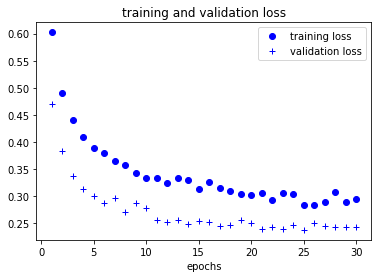

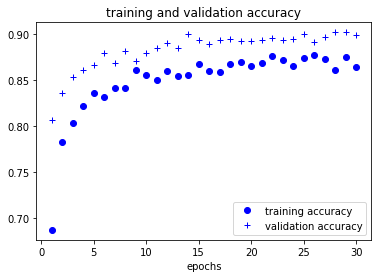

In [23]:
x = range(1, num_epochs + 1)

viz.plot(x, history['loss'], 'bo', label='training loss')
viz.plot(x, history['val_loss'], 'b+', label='validation loss')
viz.title('training and validation loss')
viz.xlabel('epochs')
viz.legend()

viz.figure()

viz.plot(x, history['binary_accuracy'], 'bo', label='training accuracy')
viz.plot(x, history['val_binary_accuracy'], 'b+', label='validation accuracy')
viz.title('training and validation accuracy')
viz.xlabel('epochs')
viz.legend()

viz.show()